In [1]:
import psycopg2
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Connecting to database 

In [2]:
conn = psycopg2.connect(
    host = '165.22.22.202' ,
    database = 'gsmarena' ,
    user = 'anomaly' ,
    password = 'Hitman.agent47'    
)

### OS ~ WEIGHT

#### Fetching required tables from database 

In [3]:
cur = conn.cursor()
cur.execute(''' SELECT "Weight" , "OS"
                FROM devices''')

rows = cur.fetchall()
col_names = [desc[0] for desc in cur.description]

os_weight = pd.DataFrame(rows, columns=col_names)

In [4]:
os_weight

,Weight,OS
0,158.0,Android 11
1,203.0,Android 11
2,204.0,Android 11
3,207.0,Android 11
4,179.0,Android 12
...,...,...
4654,160.0,Android 4.4.2
4655,143.0,Android 4.4.2
4656,192.0,Android 5.2
4657,165.0,Android 5.0.2


In [5]:
os_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  4659 non-null   float64
 1   OS      4659 non-null   object 
dtypes: float64(1), object(1)
memory usage: 72.9+ KB


In [6]:
android = []
ios = [] 
oss = []
for device in os_weight.iterrows() :
    os = device[1]['OS'] 
    weight = device[1]['Weight']
    
    if 'Android' in os or 'android' in os :
        android.append(weight)

    if 'iOS' in os or 'iPadOS' in os: 
        ios.append(weight)

    oss.append(os.split(' ')[0])

In [7]:
set(oss)

{'Android',
 'EMUI',
 'Firefox',
 'Harmony',
 'HarmonyOS',
 'KaiOS',
 'Linux',
 'Microsoft',
 'Tizen',
 'iOS',
 'iPadOS'}

In [8]:
len(ios)

74

In [9]:
len(android)

4439

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

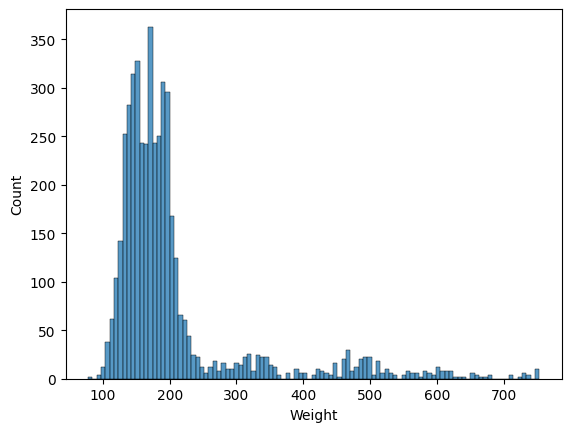

In [10]:
sns.histplot(os_weight['Weight'])

In [11]:
from scipy.stats import normaltest

In [12]:

stat_dagostino, p_value_dagostino = normaltest(os_weight['Weight'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=2480.5967478245175, p-value=0.0


In [13]:
from scipy.stats import mannwhitneyu

In [14]:
u_statistic, p_value = mannwhitneyu(ios, android )
p_value

9.780609740472955e-06

In [15]:
u_statistic, p_value = mannwhitneyu(ios, android , alternative='greater')
p_value

4.890304870236478e-06

In [16]:
u_statistic, p_value = mannwhitneyu( android ,ios, alternative='greater')
p_value

0.9999951117314231

#### Make weight noraml

In [17]:
from scipy.stats import yeojohnson , boxcox 

In [18]:
os_weight['Normal_Weight'] = yeojohnson(os_weight['Weight'])[0]

In [19]:

stat_dagostino, p_value_dagostino = normaltest(os_weight['Normal_Weight'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=23.649224757089353, p-value=7.32210737587853e-06


In [20]:
os_weight['Normal_Weight'] = boxcox(os_weight['Weight'])[0]

In [21]:
stat_dagostino, p_value_dagostino = normaltest(os_weight['Normal_Weight'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=24.186770316476146, p-value=5.596410442048247e-06
